<a href="https://colab.research.google.com/github/edoaurahman/23-2241720162-pemrograman-mobile/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tugas Praktikum

1. Buat Gamma Correction sesuai dengan petunjuk berikut

  Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

In [31]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

In [45]:
female_img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')

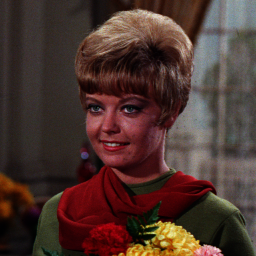

In [46]:
cv2_imshow(female_img)

In [50]:
# Membuat fungsi untuk Gamma Corrention pada citra

def gamma_correction(img, gamma):
  # Normalisasi gambar ke [0,1]
  normalized = img / 255.0
  corrected = np.power(normalized, 1.0 / gamma)
  return np.uint8(corrected * 255)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


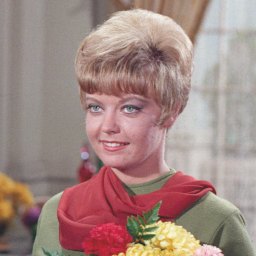

In [51]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

gamma_img = gamma_correction(female_img, gamma)
cv2_imshow(gamma_img)

2. Buat Simulasi Image Depth

  Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.

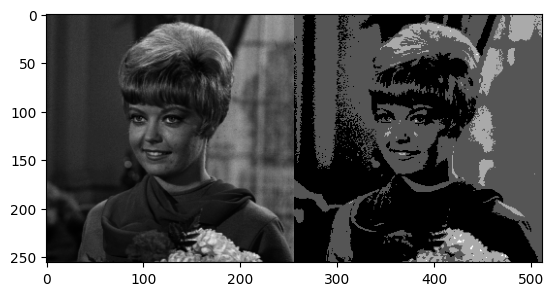

In [63]:
from matplotlib import pyplot as plt
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y, x] = np.round(original[y, x] / level) * level

frame = cv.hconcat([original, depth_image])
plt.imshow(frame, cmap='gray')


3. Buat modul Average Denoising

  Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder , gunakan modul glob (import glob).

In [67]:
import glob

galaxy = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK_MM/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

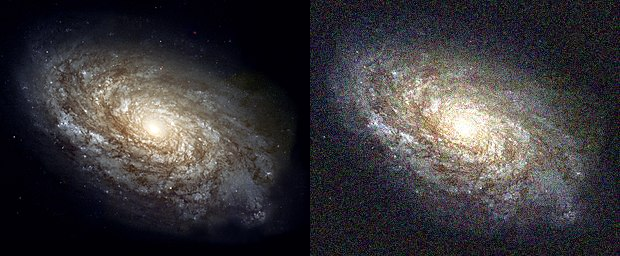

In [70]:
frame = cv.hconcat([galaxy,cv_img[0]])
cv2_imshow(frame)

In [66]:
from math import sqrt, log10
import numpy as np

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

In [71]:
def average_denoising(img, kernel_size):
  padding = kernel_size // 2
  output = np.zeros(img.shape)
  img = cv.copyMakeBorder(img, padding, padding, padding, padding, cv.BORDER_REPLICATE, value=0)
  for y in range(img.shape[0]):
    for x in range(img.shape[1]):
      output[y-padding, x-padding] = np.mean(img[y:y+kernel_size, x:x+kernel_size])

  return output


27.88763951735952
